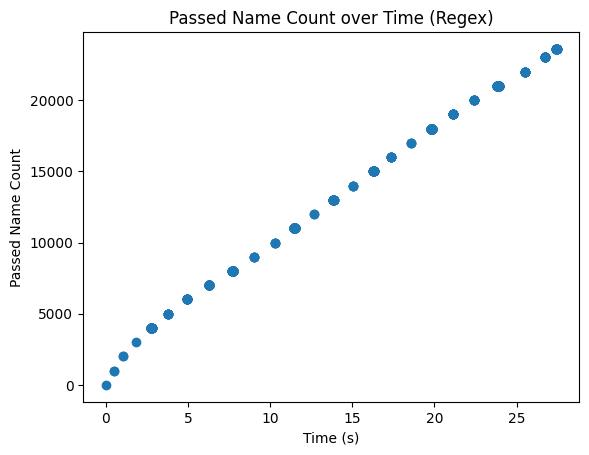

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

regex_df = pd.read_csv('timeDataRegex.csv')
regex_df.head()
plt.scatter(x=regex_df['time'],y=regex_df['count'])
plt.title('Passed Name Count over Time (Regex)')
plt.xlabel('Time (s)')
plt.ylabel('Passed Name Count')
plt.show()

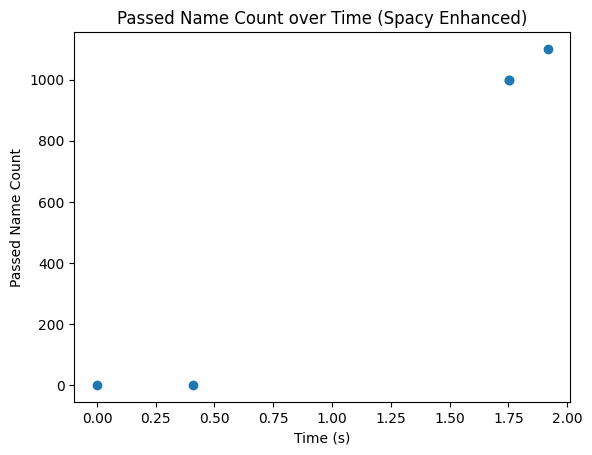

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('timeDataSpacyEnhanced.csv')
df.head()
plt.scatter(x=df['time'],y=df['count'])
plt.title('Passed Name Count over Time (Spacy Enhanced)')
plt.xlabel('Time (s)')
plt.ylabel('Passed Name Count')
plt.show()

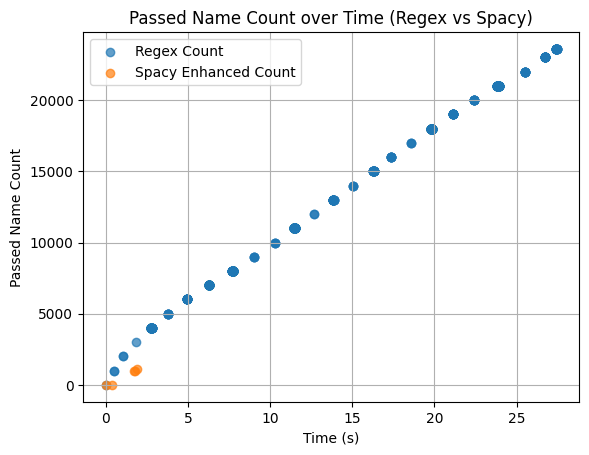

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and rename
regex_df = pd.read_csv('timeDataRegex.csv').rename(columns={'count': 'regex_count'})
spacy_df = pd.read_csv('timeDataSpacyEnhanced.csv').rename(columns={'count': 'spacy_count'})

# Merge on 'time' column, allow NaNs for non-matching entries
combined_df = pd.merge(regex_df, spacy_df, on='time', how='outer')  # or 'inner' if you only want common times
combined_df = combined_df.sort_values('time')



# plt.figure(figsize=(10, 6))
plt.scatter(combined_df['time'], combined_df['regex_count'], label='Regex Count', alpha=0.7)
plt.scatter(combined_df['time'], combined_df['spacy_count'], label='Spacy Enhanced Count', alpha=0.7)

# Labels and legend
plt.title('Passed Name Count over Time (Regex vs Spacy)')
plt.xlabel('Time (s)')
plt.ylabel('Passed Name Count')
plt.legend()
plt.grid(True)
plt.show()

combined_df.head(100)
combined_df.to_csv('test.csv')

In [26]:
import pandas as pd
import plotly.express as px

# Load and rename
regex_df = pd.read_csv('timeDataRegex.csv').rename(columns={'count': 'regex_count'})
spacy_df = pd.read_csv('timeDataSpacyEnhanced.csv').rename(columns={'count': 'spacy_count'})

# Keep only the first occurrence of each unique count
regex_df = regex_df.drop_duplicates(subset='regex_count', keep='first')
spacy_df = spacy_df.drop_duplicates(subset='spacy_count', keep='first')

# Merge and sort
combined_df = pd.merge(regex_df, spacy_df, on='time', how='outer')
combined_df = combined_df.sort_values('time')

# Convert time to minutes
combined_df['time_minutes'] = combined_df['time'] / 60

# Melt to long format
long_df = combined_df.melt(
    id_vars='time_minutes',
    value_vars=['regex_count', 'spacy_count'],
    var_name='Method',
    value_name='Passed Name Count'
)

# Plot
fig = px.scatter(
    long_df,
    x='time_minutes',
    y='Passed Name Count',
    color='Method',
    hover_data={'time_minutes': True, 'Passed Name Count': True, 'Method': False}
)

fig.update_layout(
    title='Passed Name Count over Time (Regex vs Spacy)',
    xaxis_title='Time (minutes)',
    yaxis_title='Passed Name Count',
    template='plotly_white'
)

fig.show()
fig.write_html('countVsTime.html')



In [25]:
import pandas as pd
import plotly.express as px
from sklearn.linear_model import LinearRegression
import numpy as np

# Load and prepare data
llm_df = pd.read_csv('timeDataLLMEnhanced.csv')
llm_df = llm_df.drop_duplicates(subset='count', keep='first')
llm_df['time_hrs'] = llm_df['time'] / 3600

# Fit linear regression: time_hrs = f(count)
X = llm_df[['count']]
y = llm_df['time']
model = LinearRegression()
model.fit(X, y)

# Predict time for a given count
target_count = 17864
predicted_time_hrs = model.predict([[target_count]])[0]

# Add regression line to dataframe
llm_df['fitted_time'] = model.predict(X)

# Plot
fig = px.scatter(
    llm_df,
    x='time_hrs',
    y='count',
    title='LLM Passed Name Count vs Time (with Best Fit Line)',
    labels={'time_hrs': 'Time (Hours)', 'count': 'Passed Name Count'}
)

# Add best fit line
fig.add_scatter(
    x=llm_df['fitted_time'],
    y=llm_df['count'],
    mode='lines',
    name='Best Fit Line'
)

fig.show()

print(f"Estimated time for count = {target_count}: {predicted_time_hrs:.2f} hours")



/Users/amanshaik/anaconda/envs/spacy_env/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



Estimated time for count = 17864: 15152.26 hours


In [31]:
import pandas as pd
import plotly.express as px

# Load and prepare data
llm_df = pd.read_csv('timeDataLLMEnhanced.csv')
llm_df = llm_df.drop_duplicates(subset='count', keep='first')
llm_df['time_hrs'] = llm_df['time'] / 3600

# Plot
fig = px.scatter(
    llm_df,
    x='time_hrs',
    y='count',
    title='LLM Passed Name Count vs Time',
    labels={'time_hrs': 'Time (Hours)', 'count': 'Passed Name Count'}
)


fig.show()
fig.write_html('llm_count_time.html')




In [1]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('scores.csv')
df.head()

df_melted = df.melt(id_vars='algorithm', var_name='metric', value_name='score')

# # Drop NaNs to avoid gaps in the chart

df_melted.head(8)

# # Plot
fig = px.bar(df_melted, x='algorithm', y='score', color='metric', barmode='group',
             title='Model Performance Comparison',
             text='score',
             labels={'score': 'Score', 'algorithm': 'Algorithm', 'metric': 'Metric'})

fig.update_traces(texttemplate='%{text:.4f}', textposition='outside')
fig.update_layout(yaxis=dict(range=[0, 1.1]), uniformtext_minsize=8, uniformtext_mode='hide')

fig.write_html('model_performance_comparison.html')

In [2]:
df_melted = df.melt(id_vars='algorithm', var_name='metric', value_name='score')

# Plot
fig = px.bar(df_melted, 
             x='algorithm', 
             y='score', 
             color='metric', 
             barmode='group',
             title='Algorithm Performance Comparison',
             text='score',
             labels={'score': 'Score', 'algorithm': 'Algorithm', 'metric': 'Metric'})

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(yaxis=dict(range=[0.95, 1.0]), uniformtext_minsize=8, uniformtext_mode='hide')
fig.write_html('model_performance_comparison.html')

In [37]:
import pandas as pd

df = pd.read_csv('history.csv')
close_names = df[(df['score'] > 85) & (df['score'] < 87)]
close_names.head()


,converted_name,suggested_word,score,matched
74,Ken Caufield,Ken Cofield,86.956522,False
81,Billy Dean-Hornsby,Billie Dean Hornsby,86.486486,False
87,Marty deNys,Marty De Nys,86.956522,False
94,John Ellis,John Hollis,85.714286,False
106,John Wakefield,Jean Wakefield,85.714286,False
